# Section B. Prediction Uncertainty with Bootstrapping


## Bootstrapping (Question 3)

 - Student Name: Akshay Sapra 
 - Stuident ID: 29858186
 
Programming Language used: R in Jupyter Notebook

Libraries Used: 
- ggplot2 - for data visualisation
- reshape2 - for reshaping data



### Steps for the solution
<ol>
	<li>Load the Train and test dataset provided as part of the assignment specification</li>
    <li>Reuse and modify the KNN method used in the previous question,</li>
    <li>Define the Bootstraping function</li>
       <li>Apply <code>bootstrap </code>function <code> with times = 100 </code> (the number of subset/sample) <code>and size = 25 </code> (the size of each sample/subset) on <code>knn </code>for $K\in{1,\dots,20}$ (the neighbourhood size),</li>
	<li>Report the uncertainty in the prediction in percentages.</li>
	<li>Repeat Step 2 with different values of K, times and size.</li>
	<li>Plot Average error versus $K$ where $K \in \{1,\cdots,20\}$ and identify the relation between test error and $K$</li>
    
    
</ol>

### Libraries used

In [4]:
library (ggplot2) # For data visualization
library(reshape2) # For reshaping data

### Load And Explore Data

In [5]:
# REading the data from csv 
Train= read.csv('Task1B_train.csv')
Test= read.csv('Task1B_test.csv')

In [6]:
# Checking first few rows 
head(Train)

x1,x2,x3,x4,y
1991.496,1628.75,1678.1,1772.8,2443.6
1991.504,1606.51,1678.6,1718.0,2448.2
1991.512,1618.16,1686.6,1723.1,2484.7
1991.519,1630.75,1682.9,1734.5,2487.9
1991.527,1635.47,1697.5,1754.0,2510.5
1991.535,1647.84,1723.8,1759.8,2532.5


In [7]:
# Checking first few rows 
head (Test)

x1,x2,x3,x4,y
1991.500,1613.63,1688.5,1750.5,2460.2
1991.508,1621.04,1684.1,1708.1,2470.4
1991.515,1610.61,1671.6,1714.3,2466.8
1991.523,1640.17,1703.6,1757.4,2508.4
1991.531,1645.89,1716.3,1754.3,2497.4
1991.538,1638.35,1730.5,1755.5,2556.8


In [8]:
# Checking the dimensions of Train and Test data
dim (Train)
dim (Test)

[1] 930   5

[1] 930   5

In [29]:
#divinding train and test data into separate data and label columns 
train.data=Train [,-5]
test.data=Test [,-5]
train.label=Train[1:nrow(Train),5]
test.label= Test[1:nrow(Test),5]

#### Task I
Modify the code in Activity 2 to handle bootstrapping for KNN regression.

#### KNN Function

In [10]:
# KNN function (distance should be one of euclidean, maximum, manhattan, canberra, binary or minkowski)
knn <- function(train_data, train_label, test_data, K=4, distance = 'euclidean'){
    ## count number of train samples
    train.len <- nrow(train_data)
    
    ## count number of test samples
    test.len <- nrow(test_data)
    ## calculate distances between samples
    dist <- as.matrix(dist(rbind(test_data, train_data), method= 'euclidean'))[1:test.len, (test.len+1):(test.len+train.len)]
    
    ## for each test sample...
    pred <-list()
    for (i in 1:test.len){
        ### ...find its K nearest neighbours from training sampels...
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        
        ###... and calculate the predicted labels according to the majority vote
        pred[i]<- (mean(train_label[nn]))
    }
    
    ## return the class labels as output
    return (as.numeric(pred))
}

#### Bootstrapping Function

In [11]:
# define a function that generates sample indixes based on bootstrap technique
boot <- function (original.size=100, sample.size=original.size, times=100){
    indx <- matrix(nrow=times, ncol=sample.size)
    for (t in 1:times){
        indx[t, ] <- sample(x=original.size, size=sample.size, replace = TRUE)
    }
    return(indx)
}
# just to see if it works!
boot(100, 10, 5)

54,83,50,11,78,54,20,74,43,58
57,20,96,97,96,30,100,35,11,81
72,73,36,99,26,43,27,87,76,24
57,16,25,31,50,91,32,88,8,3
92,88,8,75,18,32,9,89,13,16


##### Task II

Load **Task1B_train.csv** and **Task1B_test.csv** sets. Apply your
bootstrapping for KNN regression with times = 100 (the number of
subsets), size = 25 (the size of each subset), and change K=1,..,20 (the
neighbourhood size). Now create a boxplot where the x-axis is K, and the yaxis is the average error (and the uncertainty around it) corresponding to
each K. Save the plot in your Jupyter Notebook file for Question 3.

#### Applying Bootstrapping function

In [33]:
# fix the parameters (20,100,25)
K <- 20           # Maximum K for KNN 
L <- 100           # number of datasets
N <- 25          # size of datasets

# generate bootstrap indices:
boot.indx <- boot(nrow(train.data), N, L)

# a dataframe to track the error of samples in each case
miss <- data.frame('K'=1:K, 'L'=1:L, 'test'=rep(0,L*K))

In [34]:
# THIS MAY TAKE A FEW MINUTES TO COMPLETE
## for every k values:
for (k in 1: K){
    
    ### for every dataset sizes:
    for (l in 1:L){
        
        #### calculate iteration index i
        i <- (k-1)*L+l
        
        #### save sample indices that were selected by bootstrap
        indx <- boot.indx[l,]
        
        #### save the value of k and l
        miss[i,'K'] <- k
        miss[i,'L'] <- l
        
        #### calculate and record the train and test missclassification rates
        miss[i,'test'] <-  sqrt(mean((knn(train.data[indx,], train.label[indx], test.data, k) - test.label)^2))
    } 
}

#### Visualisation

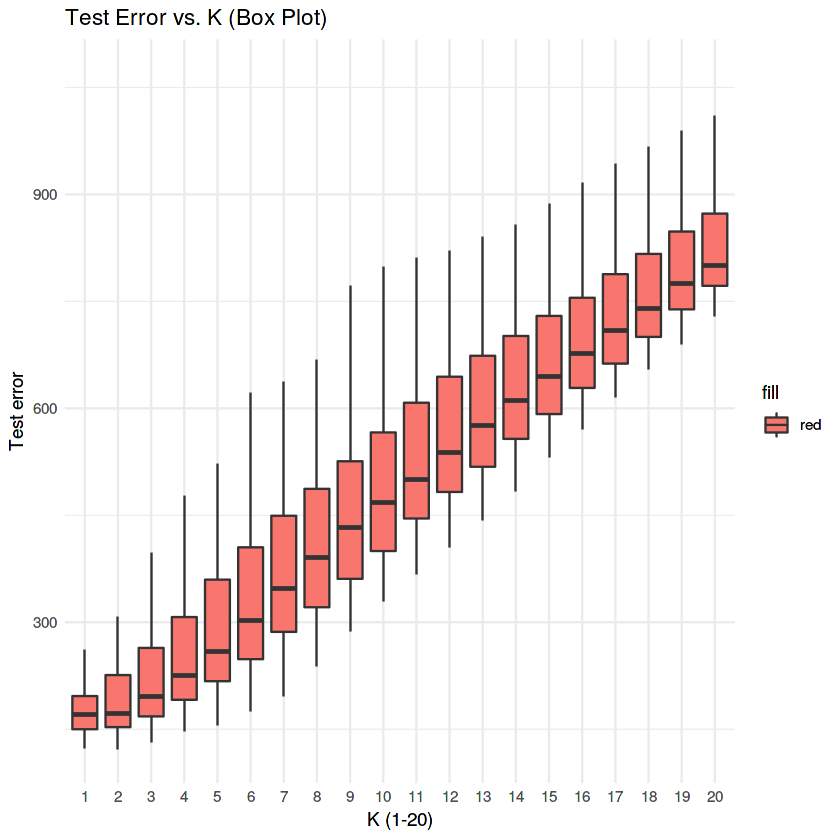

In [36]:
ggplot(data=miss, aes(factor(K), test,fill="red")) + geom_boxplot(outlier.shape = NA)  + 
    scale_color_discrete(guide = guide_legend(title = NULL)) +  ylab('Test error') + xlab('K (1-20)') +
    ggtitle('Test Error vs. K (Box Plot)') + theme_minimal()
# ignore the warnings (because of ignoring outliers)
options(warn=-1)



#### Task III

Based on the plot in the previous part (Part II), how does the test error
and its uncertainty behave as K increases? Explain in your Jupyter
Notebook file.

**Observation**
* It is evident from the above graph that test error and it's uncertainity increases with increase in K.
* Although Error constantly increases with increase in K, Uncertainity is also increasing with K but it starts decreasing after the value of K is increased more than 12.
* Least Error and uncertainity is observed for K=1, which is possibly due to overfitting.

#### Task IV

Load **Task1B_train.csv** and **Task1B_test.csv** sets. Apply your
bootstrapping for KNN regression with K=10 (the neighbourhood size),
size = 25 (the size of each subset), and change times = 10, 20, 30,.., 200
(the number of subsets). Now create a boxplot where the x-axis is ‘times’,
and the y-axis is the average error (and the uncertainty around it)
corresponding to each value of ‘times’. Save the plot in your Jupyter
Notebook file for Question 3.

In [45]:
# fix the parameters (20,100,25)
K1 <- 10           # Maximum K for KNN 
L1 <- seq(10,200,10)           # number of datasets from 10,20..100
N1 <- 25          # size of datasets

result <- data.frame()
for (l in L1){
    # generate bootstrap indices:
    boot.indx <- boot(nrow(train.data), N1, l)
    # a dataframe to track the number of missclassified samples in each case
    miss1 <- data.frame ('L'=l, 'l'=1:l, 'test'=rep(NA,l))
    for (i in 1:l){
        #### save sample indices that were selected by bootstrap
        indx <- boot.indx[i,]
    
        #### save the value of k and l
        
        #### calculate and record the train and test missclassification rates
        miss1[i,'test'] <-  sqrt(mean((knn(train.data[indx,], train.label[indx], test.data, K1) - test.label)^2))
    }

    result <-rbind (result,miss1)
}

#### Visualisation

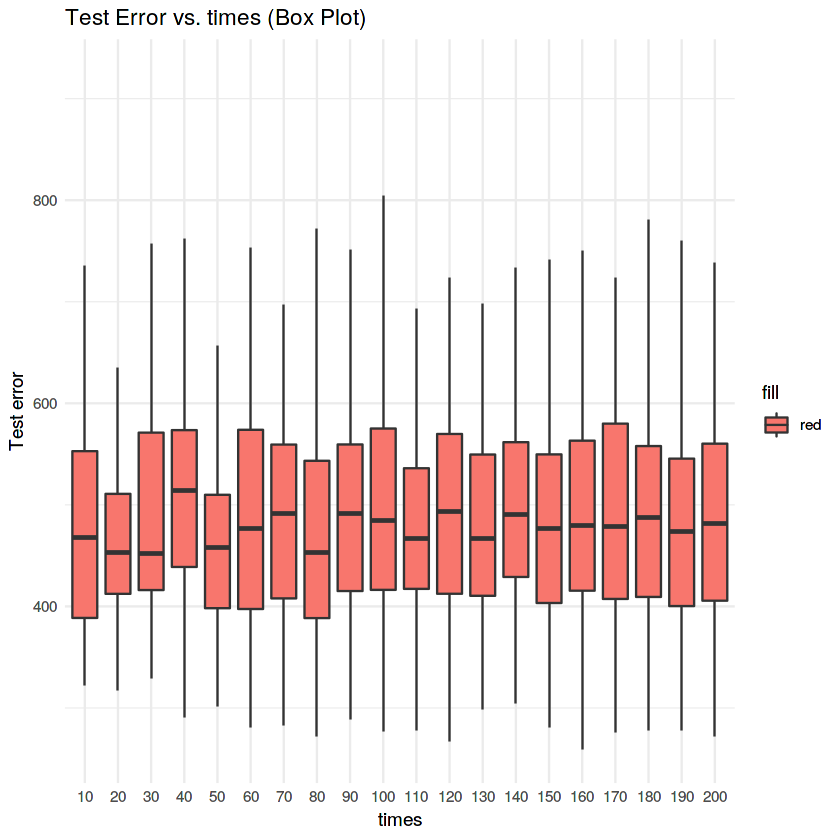

In [53]:
#Reshaping Data for visualisation
result.new <- melt(result, id=c('L', 'l')) 
names(result.new) <- c('L', 'l', 'type', 'test')
#Reference: https://github.com/hadley/reshape/issues/63

ggplot(data=result.new, aes(x=factor(L), test,fill="red")) + geom_boxplot(outlier.shape = NA)  + 
    scale_color_discrete(guide = guide_legend(title = NULL))  + ylab('Test error') + xlab('times') +
    ggtitle('Test Error vs. times (Box Plot)') + theme_minimal()
# ignore the warnings (because of ignoring outliers)
options(warn=-1)



#### Task V
Based on the plot in the previous part (Part IV), how does the test error
and its uncertainty behave as the number of subsets in bootstrapping
increases? Explain in your Jupyter Notebook file.

**Observation**
* It can be seen in the graph that there is no affect of number of subset on test error when K is kept constant.
* It could be a possibility that it does not affect the error because samples are normally distributed.